In [1]:
%run ../template.ipynb

In [2]:
exp_id = "050318"
series_names = ["mainstream", "maxsharing", "nosharing"]

In [3]:
setups = dataloaders.load_setups(exp_id,
                                 setup_file_str="/setups.{exp_id}-*{version}.pickle",
                                 legacy='InconsistentIds')

Loading setups... Using InconsistentIds... Done


In [4]:
rows = []
for series_name in series_names:
    schedules = dataloaders.load_schedules("050318", "greedy." + series_name + ".sim.*.v1", variant='v1+metrics', setups=setups)
    # Extract some attributes from the schedules.
    # Add on some based on the file name.
    rows += ex(schedules,
               constant={'scheduler': 'greedy', 'sharing': series_name})
df = comb(rows)

In [5]:
df_view = df[df['budget'] == 150]
grouped = df_view.groupby(['sharing', 'num_apps'])

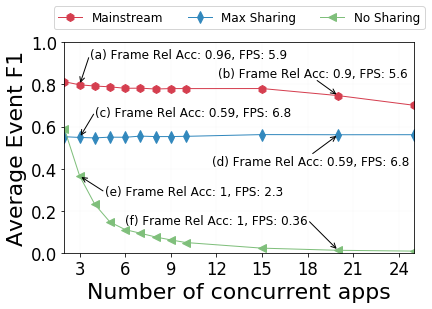

In [16]:
series_fps = agg2series(grouped['fps'].mean(), names=series_names)
series_acc = agg2series(1. - grouped['rel_acc'].mean(), names=series_names)

series = agg2series(grouped['f1'].mean(),
                     names=series_names,
                     plotparams=dict(lw=1, markersize=8))

ax = plot.variants(series,
                   xgrid=grids.x.num_apps,
                   ygrid=grids.y.f1,
                   legend_kwargs=dict(bbox_to_anchor=(0.5, 1.2), fontsize=12, ncol=3, loc='upper center'))

annotations = [
    [Annotation(pt=1, xy=(10, 30), name='a', arrow_kwargs=dict(shrinkA=3), va='center'),
     Annotation(pt=10, xy=(-25, 18), name='b', arrow_kwargs=dict(shrinkA=5), ha='center')],
    [Annotation(pt=1, xy=(15, 25), name='c', va='center'),
     Annotation(pt=10, xy=(-27, -20), name='d', ha='center', va='top')],
    [Annotation(pt=1, xy=(25, -16), name='e', va='center'),
     Annotation(pt=10, xy=(-30, 30), name='f', ha='right', va='center')],
]

add_annotations(annotations,
                series,
                fmt_str="({name}) Frame Rel Acc: {acc:.2g}, FPS: {fps:.2g}",
                extra={'fps': series_fps, 'acc': series_acc},
                ax=ax)
save('scheduler', exp_id, '{}-7hybrid-annotated-b{:g}'.format("f1", 150), bbox_inches="tight")